In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
inputFolderName="/Users/luizaadelinaciucu/Work/ATLAS/TrackML/input/ttbar_mu200-generic"
outputFolderName="/Users/luizaadelinaciucu/Work/ATLAS/TrackML/output2"
eventNumber="000000099"
inputFileName_hits_recon=inputFolderName+"/event"+eventNumber+"-hits.csv"
inputFileName_hits_truth=inputFolderName+"/event"+eventNumber+"-truth.csv"

In [3]:
df_hits_recon=pd.read_csv(inputFileName_hits_recon)
df_hits_recon.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,0,53.6895,8.81461,-1502.5,7,2,1
1,1,70.7608,7.70057,-1502.5,7,2,1
2,2,80.2306,11.40500,-1502.5,7,2,1
3,3,63.7141,4.03639,-1502.5,7,2,1
4,4,63.8302,3.99537,-1502.5,7,2,1


In [4]:
df_hits_truth=pd.read_csv(inputFileName_hits_truth)
df_hits_truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz
0,0,18014467228958720,53.6668,8.82130,-1502.5,0.973584,0.159988,-28.120100
1,1,22528787094700032,70.7375,7.71636,-1502.5,0.213369,0.023315,-4.386220
2,2,63052593806442496,80.2098,11.40200,-1502.5,0.050232,0.007147,-0.985516
3,3,103588701304520704,63.7169,4.02437,-1502.5,0.196107,0.012337,-4.797500
4,4,117101080734597120,63.8096,4.00231,-1502.5,0.049758,0.003124,-1.159650


In [5]:
# combine truth and recon

df_hits=pd.concat([df_hits_recon,df_hits_truth],axis=1,sort=False)
df_hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz
0,0,53.6895,8.81461,-1502.5,7,2,1,0,18014467228958720,53.6668,8.82130,-1502.5,0.973584,0.159988,-28.120100
1,1,70.7608,7.70057,-1502.5,7,2,1,1,22528787094700032,70.7375,7.71636,-1502.5,0.213369,0.023315,-4.386220
2,2,80.2306,11.40500,-1502.5,7,2,1,2,63052593806442496,80.2098,11.40200,-1502.5,0.050232,0.007147,-0.985516
3,3,63.7141,4.03639,-1502.5,7,2,1,3,103588701304520704,63.7169,4.02437,-1502.5,0.196107,0.012337,-4.797500
4,4,63.8302,3.99537,-1502.5,7,2,1,4,117101080734597120,63.8096,4.00231,-1502.5,0.049758,0.003124,-1.159650


In [6]:
nparray_volume_id=df_hits["volume_id"].values
nparray_layer_id=df_hits["layer_id"].values
nparray_module_id=df_hits["module_id"].values
nparray_z=df_hits["z"].values
nparray_r=np.sqrt(df_hits["x"].values**2+df_hits["y"].values**2)
nparray_particle_id=df_hits["particle_id"].values
nrHits=len(nparray_volume_id) # or nrHits=nparray_volume_id.shape[0]

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0., 19705.,
        29600., 19483.,     0.,     0.,  8852., 19902.,  8318.,     0.,
         2836.,  5662.,  2535.,     0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

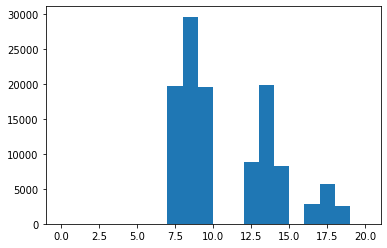

In [7]:
plt.hist(nparray_volume_id,bins=range(0,21,1))

(array([    0.,     0., 29124.,     0., 24923.,     0., 20030.,     0.,
        18354.,     0.,  9433.,     0.,  9438.,     0.,  5591.,     0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Patch objects>)

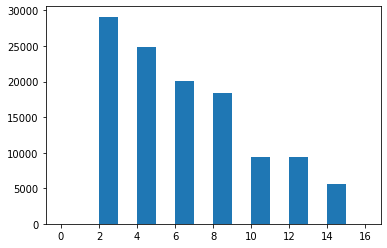

In [8]:
plt.hist(nparray_layer_id,bins=range(0,17,1))

(array([4.1361e+04, 2.0925e+04, 1.1839e+04, 5.6190e+03, 3.7000e+03,
        2.9480e+03, 2.6600e+03, 2.7660e+03, 2.4960e+03, 2.1230e+03,
        1.9350e+03, 1.6740e+03, 1.7090e+03, 1.5360e+03, 1.3030e+03,
        1.0860e+03, 9.6100e+02, 7.2200e+02, 7.5500e+02, 7.7400e+02,
        7.2200e+02, 6.7000e+02, 4.8200e+02, 4.1000e+02, 3.1600e+02,
        3.1200e+02, 3.2100e+02, 3.2400e+02, 3.3000e+02, 2.9400e+02,
        3.0800e+02, 2.7200e+02, 2.8000e+02, 2.1600e+02, 1.9300e+02,
        1.7900e+02, 1.8000e+02, 1.6600e+02, 1.7000e+02, 1.4900e+02,
        1.4900e+02, 1.6900e+02, 1.6700e+02, 1.1300e+02, 9.4000e+01,
        1.1000e+02, 8.3000e+01, 8.0000e+01, 9.9000e+01, 9.4000e+01,
        5.1000e+01, 5.1000e+01, 4.1000e+01, 3.7000e+01, 4.0000e+01,
        4.6000e+01, 2.7000e+01, 4.6000e+01, 4.4000e+01, 3.7000e+01,
        3.8000e+01, 4.2000e+01, 2.5000e+01, 2.4000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  4

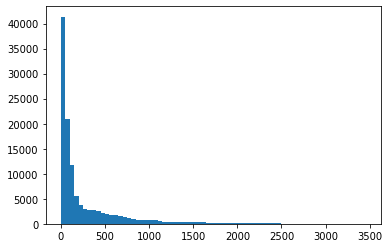

In [9]:
plt.hist(nparray_module_id,bins=range(0,3500,50))

(array([1935.,    0.,    0.,    0.,    0.,    0., 1939.,    0.,    0.,
           0.,    0.,    0.,    0., 1982.,    0.,    0.,    0.,    0.,
           0., 1988.,    0.,    0.,    0.,    0., 4636.,    0.,    0.,
        1213., 1503., 1904.,    0., 2924.,  441., 3333.,  522.,  516.,
        3486.,  538., 3490., 3501.,  761.,  870., 1582., 1823., 1827.,
        2275., 2669., 3444., 4361., 4856., 4488., 3716., 2981., 2405.,
        2087., 1846., 1597., 1533.,  858.,  639., 3457., 3437.,  495.,
        3321.,  513.,  443., 3188.,  390., 2867.,    0., 1677., 1508.,
        1263.,    0.,    0., 4469.,    0.,    0.,    0.,    0., 1792.,
           0.,    0.,    0.,    0.,    0., 1876.,    0.,    0.,    0.,
           0.,    0.,    0., 1861.,    0.,    0.,    0.,    0.,    0.,
        1867.]),
 array([-2955.5 , -2896.39, -2837.28, -2778.17, -2719.06, -2659.95,
        -2600.84, -2541.73, -2482.62, -2423.51, -2364.4 , -2305.29,
        -2246.18, -2187.07, -2127.96, -2068.85, -2009.74, -1950.63

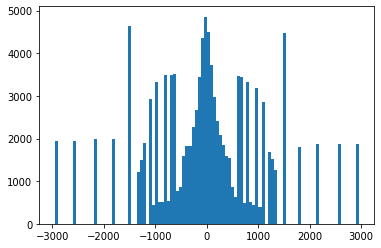

In [10]:
plt.hist(nparray_z,bins=100)

(array([17793.,  5396.,  4158.,  3389., 10349.,  2207.,  1907.,  1812.,
         8431.,  1999.,  1596.,  1478.,  1270.,  1085.,  5918.,     0.,
            0.,     0.,     0.,     0.,     0.,   700.,  2508.,  5184.,
          601.,   623.,   584.,   507.,   501.,   482.,   447.,   412.,
         1753.,  4461.,   348.,   362.,   522.,   389.,   407.,   351.,
          389.,   392.,   337.,   357.,   339.,   301.,  1196.,  3823.,
          299.,   272.,   236.,   331.,   325.,   340.,   312.,   275.,
          307.,   251.,   272.,   252.,   240.,   254.,   754.,  3382.,
          223.,   204.,   208.,    59.,     0.,     0.,     0.,     0.,
          178.,   211.,   144.,   137.,   185.,   207.,   462.,  2943.,
          198.,   167.,   212.,   176.,   344.,   340.,   361.,   349.,
          189.,   204.,   151.,   151.,   146.,   153.,   163.,   134.,
          129.,   126.,   195.,  2678.]),
 array([  30.02864632,   39.9818199 ,   49.93499348,   59.88816705,
          69.84134063,   7

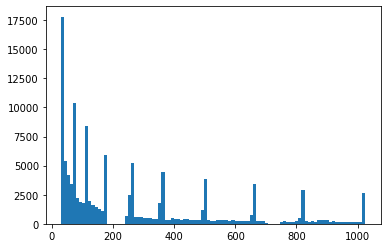

In [11]:
plt.hist(nparray_r,bins=100)

(array([ 832., 1248., 2360., 1207., 1274., 2056.,  585.,  188.,  532.,
         685.,  920., 2147., 1116., 3234., 2543.,  785.,  525., 2479.,
         911.,  601., 1925.,  374., 2084., 1059.,  711., 3091.,  905.,
         266., 1058.,    0., 1838.,    0.,  181., 2939.,  534.,  130.,
        1942., 2332.,  733., 2195.,  270.,  840., 1734., 1308.,  908.,
        1850.,  743.,  943.,  284.,  354., 2219., 2728.,   16., 1500.,
           0.,  315., 2577., 2414.,  374.,  737., 2310.,    0., 2193.,
        2783.,    0.,  842.,    0., 3517.,  495.,  401., 2030., 1729.,
         860.,  453.,  691.,  249., 1180.,  759.,  689.,  110.,  712.,
        2059.,  596.,  683.,  991., 2377.,  319., 2124.,    0.,  441.,
         498.,  246., 1249.,  997.,  679.,  428., 1449., 2514., 4026.,
         575.]),
 array([5.32480000e+04, 9.36754701e+15, 1.87350940e+16, 2.81026410e+16,
        3.74701880e+16, 4.68377351e+16, 5.62052821e+16, 6.55728291e+16,
        7.49403761e+16, 8.43079231e+16, 9.36754701e+16, 1.

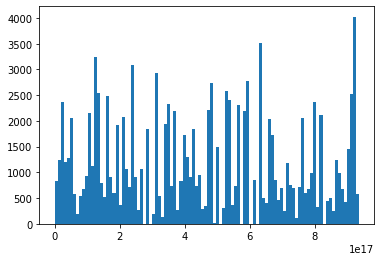

In [12]:
plt.hist(nparray_particle_id,bins=100)


(array([   0.,  118.,  232.,  143.,  295.,  178.,  341.,  264.,  378.,
         455., 1230., 1871., 1966., 1448., 1059.,  496.,  187.,   72.,
          29.,   10.,   11.,    3.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 22 Patch objects>)

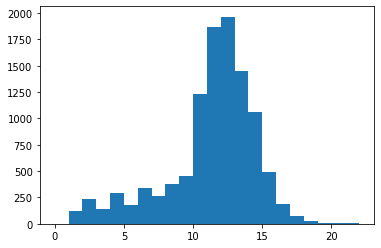

In [21]:
# count the number of hits for each particle;
# from this we learn that the majority of particles have a number of hits smaller than 20, 
# so we choose a bucket size of 20

# create counter dictionary
d={}
for i in df_hits["particle_id"]:
    if i not in d.keys():
        d[i]=1
    else:
        d[i]+=1
# done for loop 
if False:
    for i in sorted(d.keys()):
        print("particle_id",i,"counter",d[i])
        
# plot the counter of hits for each particle in a histogram
plt.hist(d.values(),bins=range(0,23,1))


In [22]:
debug=False

# create list of indices to keep as a subset of all indices
list_index=[]

nparray_volume_id=df_hits["volume_id"].values
nparray_layer_id=df_hits["layer_id"].values
nparray_module_id=df_hits["module_id"].values
nparray_z=df_hits["z"].values
nparray_r=np.sqrt(df_hits["x"].values**2+df_hits["y"].values**2)
nrHits=len(nparray_volume_id) # or nrHits=nparray_volume_id.shape[0]
print("Study nrHits",nrHits)

for i in range(nrHits):
    # read current values for index i from the numpy arrays
    volume_id=nparray_volume_id[i]
    layer_id=nparray_layer_id[i]
    module_id=nparray_module_id[i]
    z=nparray_z[i]
    r=nparray_r[i]

    # add conditions to keep only the subset of indices we want
    # if (volume_id==8)==False:
        #continue
    # if (layer_id==2)==False:
        #continue
    # if (module_id<2)==False:
        #continue
    
    # print the current hit that survived the selection
    # if debug:
        #print("i",i,"volume_id",volume_id,"layer_id",layer_id,"module_id",module_id,"z",z,"r",r)
    
    # add the current surviving hit to the list of indices 
    list_index.append(i)
# done for loop

print("This number of indices survived",len(list_index))

# create a new data frame with only the subset of hits we kept, so we call it df_reduced
df_reduced=df_hits.iloc[list_index]
df_reduced

Study nrHits 116893
This number of indices survived 116893


,hit_id,x,y,z,volume_id,layer_id,module_id,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz
0,0,53.6895,8.81461,-1502.5,7,2,1,0,18014467228958720,53.6668,8.82130,-1502.5,0.973584,0.159988,-28.120100
1,1,70.7608,7.70057,-1502.5,7,2,1,1,22528787094700032,70.7375,7.71636,-1502.5,0.213369,0.023315,-4.386220
2,2,80.2306,11.40500,-1502.5,7,2,1,2,63052593806442496,80.2098,11.40200,-1502.5,0.050232,0.007147,-0.985516
3,3,63.7141,4.03639,-1502.5,7,2,1,3,103588701304520704,63.7169,4.02437,-1502.5,0.196107,0.012337,-4.797500
4,4,63.8302,3.99537,-1502.5,7,2,1,4,117101080734597120,63.8096,4.00231,-1502.5,0.049758,0.003124,-1.159650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116888,116888,-961.3640,53.08930,2952.5,18,12,98,116888,585472418324152320,-956.7110,52.81380,2952.5,-1.442520,0.079645,4.686170
116889,116889,-972.9560,34.46040,2952.5,18,12,98,116889,671040467646808064,-973.8240,34.57300,2952.5,-0.447856,0.015907,1.394060
116890,116890,-937.8320,95.85610,2952.5,18,12,98,116890,765613654639902720,-937.8470,95.88900,2952.5,-0.404170,0.041329,1.265240
116891,116891,-901.0230,18.39200,2952.5,18,12,98,116891,765620801465483264,-896.3470,18.07520,2952.5,-0.147255,0.002971,0.482319


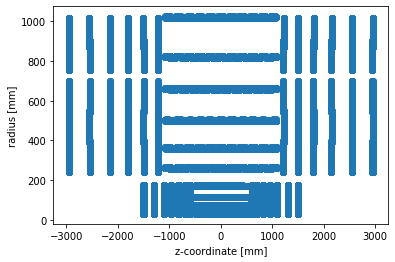

In [24]:
# for the subset of hits plot them as a 2D histogram
# with the z-axis on the horizontal and the r-axis on the vertical
# to look like the physical detector

nparray_reduced_volume_id=df_reduced["volume_id"].values
nparray_reduced_layer_id=df_reduced["layer_id"].values
nparray_reduced_module_id=df_reduced["module_id"].values

nparray_reduced_z=df_reduced["z"].values
nparray_reduced_r=np.sqrt(df_reduced["x"].values**2+df_reduced["y"].values**2)
plt.scatter(

    nparray_reduced_z,
    nparray_reduced_r,
    )
plt.ylabel("radius [mm]")
plt.xlabel("z-coordinate [mm]")

plt.savefig(outputFolderName+"/DataExploration_z_vs_r_scatter.pdf")
plt.savefig(outputFolderName+"/DataExploration_z_vs_r_scatter.png")


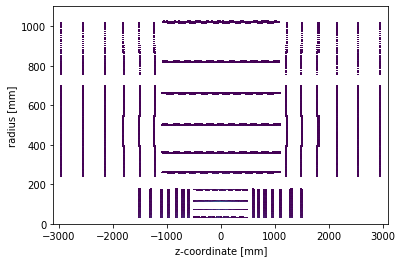

In [25]:
plt.hist2d(
        nparray_reduced_z,
        nparray_reduced_r,
        bins=[range(-3100,3120,20),range(0,1101,1)],
        cmin=1,
        )
plt.ylabel("radius [mm]")
plt.xlabel("z-coordinate [mm]")

plt.savefig(outputFolderName+"/DataExploration_z_vs_r_hist_2D.pdf")
plt.savefig(outputFolderName+"/DataExploration_z_vs_r_hist_2D.png")


(array([2.9911e+04, 1.7484e+04, 1.3564e+04, 9.5840e+03, 5.3730e+03,
        3.3000e+03, 2.5750e+03, 2.1340e+03, 1.9120e+03, 1.7020e+03,
        1.6670e+03, 1.7430e+03, 1.7240e+03, 1.5610e+03, 1.3930e+03,
        1.2680e+03, 1.2290e+03, 1.1740e+03, 9.9000e+02, 1.1260e+03,
        1.0220e+03, 9.7400e+02, 8.5700e+02, 7.0500e+02, 6.8600e+02,
        6.4700e+02, 5.3700e+02, 4.5000e+02, 4.8200e+02, 4.9200e+02,
        4.7400e+02, 5.2100e+02, 4.4700e+02, 4.1500e+02, 3.4100e+02,
        3.0200e+02, 2.9100e+02, 2.1800e+02, 1.9000e+02, 2.2100e+02,
        1.7700e+02, 2.2000e+02, 2.0700e+02, 1.9000e+02, 2.1700e+02,
        2.0500e+02, 1.7600e+02, 2.1300e+02, 1.8600e+02, 1.5900e+02,
        1.8800e+02, 1.5000e+02, 1.4500e+02, 1.1700e+02, 1.3700e+02,
        8.7000e+01, 1.2800e+02, 1.1700e+02, 1.1500e+02, 1.1000e+02,
        1.0100e+02, 1.0400e+02, 8.3000e+01, 1.0000e+02, 9.8000e+01,
        1.1500e+02, 1.0900e+02, 8.3000e+01, 6.6000e+01, 6.3000e+01,
        5.8000e+01, 7.6000e+01, 5.8000e+01, 4.50

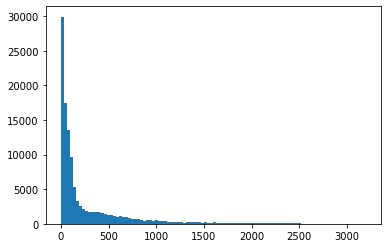

In [26]:
plt.hist(nparray_reduced_module_id,bins=100)

(array([[3.8740e+03, 3.9700e+03, 9.2560e+03, 1.7833e+04, 1.4989e+04,
         7.2810e+03, 1.4023e+04, 8.9170e+03, 3.6680e+03, 3.7280e+03],
        [       nan,        nan,        nan, 8.7100e+02, 6.2310e+03,
         6.7730e+03,        nan,        nan,        nan,        nan],
        [       nan,        nan,        nan, 4.7000e+01, 1.9990e+03,
         3.7930e+03, 1.0130e+03,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan, 9.3400e+02,
         1.8080e+03, 6.7800e+02,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan, 2.8100e+02,
         1.1010e+03, 5.6800e+02,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan, 3.4000e+01,
         8.1200e+02, 4.4800e+02,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan,        nan,
         3.2900e+02, 5.9300e+02,        nan,        nan,        nan],
        [       nan,       

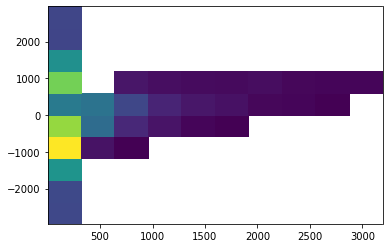

In [27]:
plt.hist2d(nparray_reduced_module_id,nparray_reduced_z,cmin=1)

(array([[   nan,    nan,   876.,   663.,   528.,   511.,   261.,   283.,
           484.,   268.],
        [   nan,    nan,   965.,   672.,   560.,   504.,   290.,   270.,
           467.,   242.],
        [ 4590.,   822.,  1043.,   637.,   583.,   511.,   248.,   236.,
           376.,   210.],
        [12005.,  2288.,   948.,   927.,   811.,    nan,   695.,   579.,
            nan,   498.],
        [13038.,  2741.,  2333.,  1923.,  1490.,    nan,  1186.,   959.,
            nan,   798.],
        [11349.,  2472.,  2160.,  1797.,  1472.,    nan,  1175.,   935.,
            nan,   790.],
        [11891.,  2132.,   851.,   788.,   692.,    nan,   654.,   538.,
            nan,   565.],
        [ 4568.,   892.,   834.,   703.,   513.,   429.,   246.,   204.,
           336.,   192.],
        [   nan,    nan,   813.,   679.,   539.,   492.,   261.,   213.,
           459.,   212.],
        [   nan,    nan,   867.,   663.,   517.,   454.,   308.,   250.,
           418.,   251.]]),
 array([

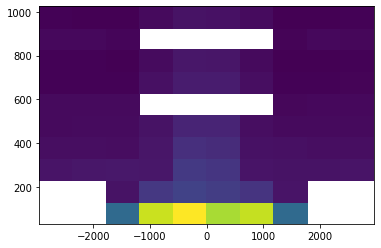

In [28]:
plt.hist2d(nparray_reduced_z,nparray_reduced_r,cmin=1)

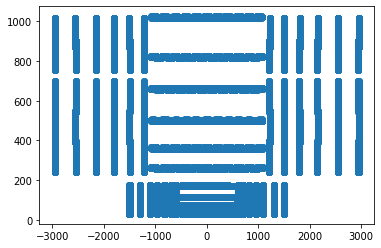

In [29]:
plt.scatter(nparray_reduced_z,nparray_reduced_r)